In [1]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import pylab
%config InlineBackend.figure_format = 'retina'
matplotlib.rcParams['figure.dpi'] = 80
textsize = 'x-large'
params = {'legend.fontsize': 'large',
          'figure.figsize': (5, 4),
         'axes.labelsize': textsize,
         'axes.titlesize': textsize,
         'xtick.labelsize': textsize,
         'ytick.labelsize': textsize}
pylab.rcParams.update(params)

We can read in our training data from a `.npy` file:

In [2]:
train_fn = 'data/cosmology_train.npy'
train = np.load(train_fn, allow_pickle=True)

The file is saved as an array of dictionaries that have x (input parameters), y (output statistics), and labels.

In [3]:
ntrain = train.shape[0]
print("Number of datapoints:", ntrain)
print("Dict keys:", train[0].keys())

Number of datapoints: 1000
Dict keys: dict_keys(['x', 'y', 'label'])


The cosmology dataset contains cosmological parameters (Omega_m, sigma8, Omega_b) as inputs, and the correlation function as output. The correlation function is measured at 10 separation values $r$.

In [4]:
rvals = np.linspace(50, 140, 10)
xs = np.array([d['x'] for d in train])
ys = np.array([d['y'] for d in train])
print("Number of input parameters:", xs.shape[1])
print("Number of output values:", ys.shape[1])

Number of input parameters: 3
Number of output values: 10


We can plot our training set of statistics:

Text(0, 0.5, '$\\xi(r)$')

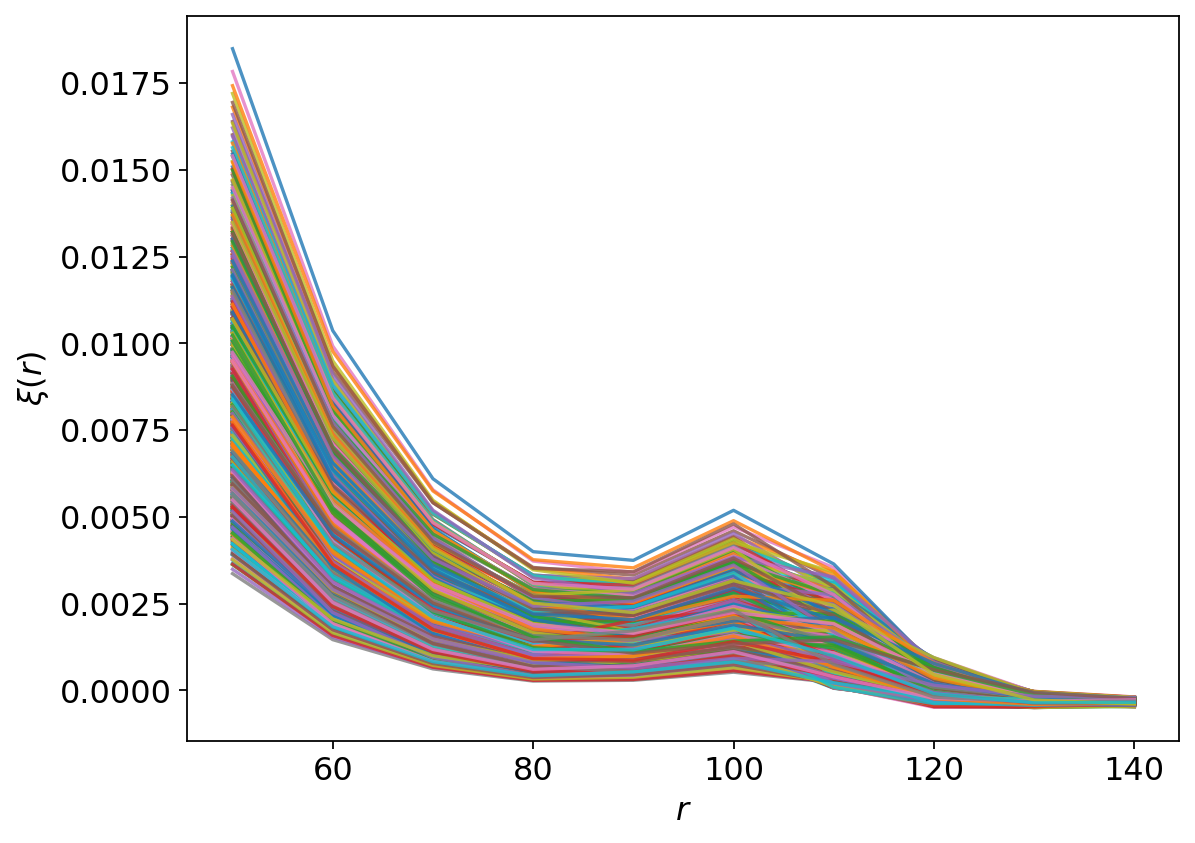

In [5]:
plt.figure(figsize=(8,6))
yplot = ys.copy()
np.random.shuffle(yplot) # shuffle so that color order isn't weird
plt.plot(rvals, yplot.T, alpha=0.8)
plt.xlabel('$r$')
plt.ylabel(r'$\xi(r)$')

Let's do the same for our test set:

In [6]:
test_fn = 'data/cosmology_test.npy'
test = np.load(test_fn, allow_pickle=True)
ntest = test.shape[0]
print("Number of datapoints:", ntest)
print("Dict keys:", test[0].keys())
xs = np.array([d['x'] for d in test])
ys = np.array([d['y'] for d in test])
print("Number of input parameters:", xs.shape[1])
print("Number of output values:", ys.shape[1])

Number of datapoints: 100
Dict keys: dict_keys(['x', 'y', 'label'])
Number of input parameters: 3
Number of output values: 10


Text(0, 0.5, '$\\xi(r)$')

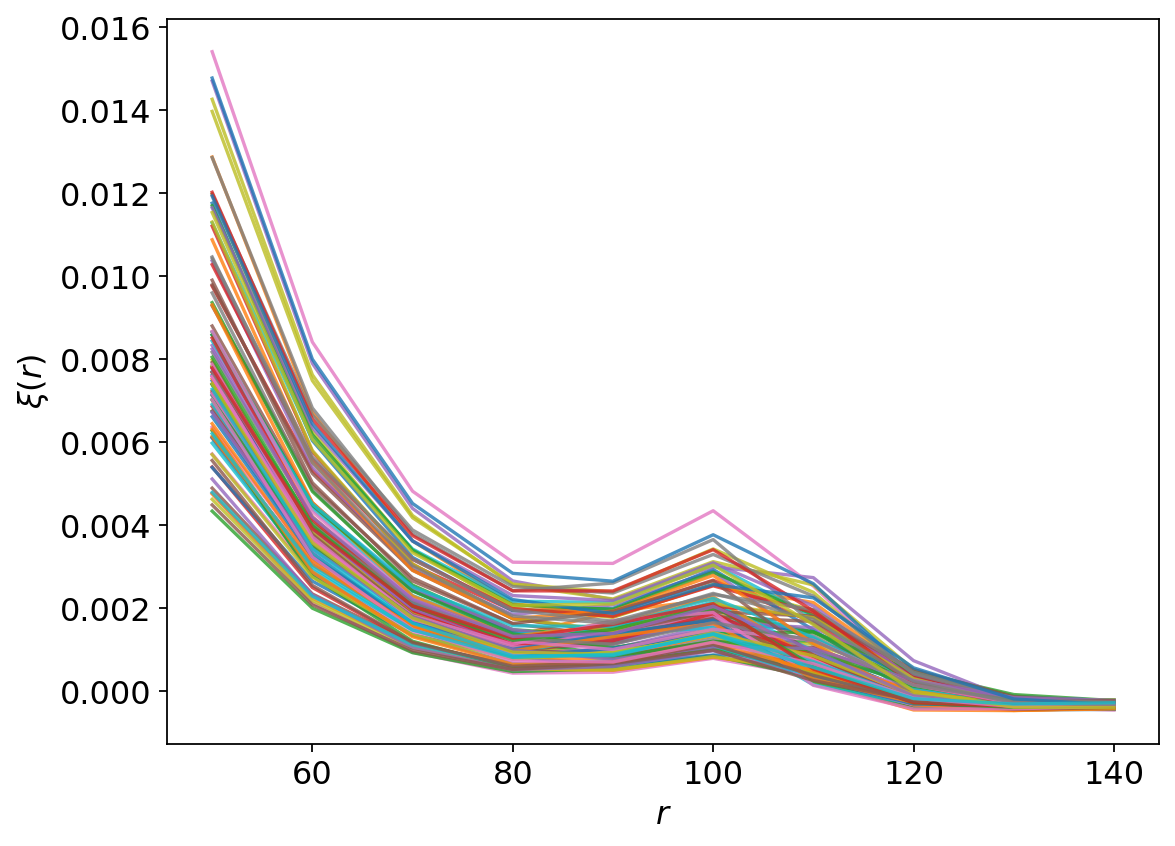

In [7]:
plt.figure(figsize=(8,6))
plt.plot(rvals, ys.T, alpha=0.8)
plt.xlabel('$r$')
plt.ylabel(r'$\xi(r)$')

We can also check out the parameter space. We plot the testing and training points used:

TODO!